In [1]:
import pandas as pd
import numpy as np

In [7]:
data = {
    'A': [1, 2, 100, 4, 5],
    'B': [3, np.nan, 7, 8, 9],
    'C': [np.nan, 12, 13, 14, 15]
}
df = pd.DataFrame(data)
df

,A,B,C
0,1,3.0,NaN
1,2,NaN,12.0
2,100,7.0,13.0
3,4,8.0,14.0
4,5,9.0,15.0


In [3]:
df.isnull().sum()

A    0
B    1
C    1
dtype: int64

In [4]:
df.dropna()

,A,B,C
2,100,7.0,13.0
3,4,8.0,14.0
4,5,9.0,15.0


In [6]:
# drop a particular column  with null values
df.dropna(axis = 1)

,A
0,1
1,2
2,100
3,4
4,5


In [8]:
#  imputation of null values with mean
df['B'].fillna(df['B'].mean())

0    3.00
1    6.75
2    7.00
3    8.00
4    9.00
Name: B, dtype: float64

In [9]:
#  imputation of null values with median
df['B'].fillna(df['B'].median())

0    3.0
1    7.5
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [10]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
(df.isnull().sum()/len(df.index))*100.0

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [13]:
df.shape

(891, 15)

In [24]:
df[df['embark_town'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [28]:
df['embark_town'].fillna(df['embark_town'].mode, inplace=True)

In [29]:
df['embark_town'].isna().value_counts()

embark_town
False    891
Name: count, dtype: int64

In [32]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
df['embarked'].fillna(df['embarked'].mode, inplace=True)
df['embarked'].isna().value_counts()

embarked
False    891
Name: count, dtype: int64

In [35]:
df.drop('deck', inplace=True, axis = 1)

In [36]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [38]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

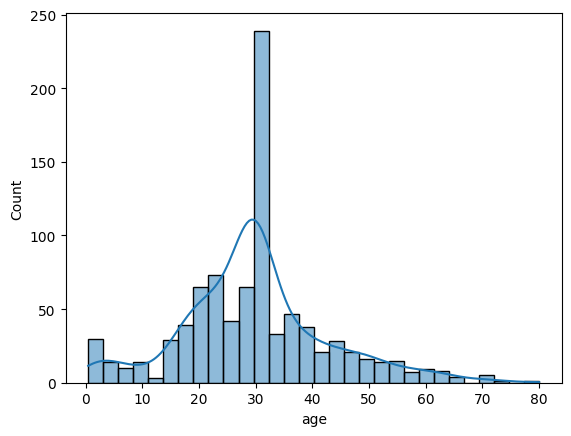

In [41]:
sns.histplot(df.age, kde = True)

#### It is a kind f normal distribution, hence no outlier will be present in df['age'].

In [39]:
df.age.fillna(df.age.mean(), inplace=True)

In [40]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64